## Modelos de Regressão ##
#### Regressão Polinomial ####

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [82]:
# Seguindo a lógica utilizada no notebook de regressão linear, vamos definir a variável n para o tamanho do conjunto de dados
n = 100

# x será a uma variável independente 
x = 6 * np.random.rand(n, 1) - 3

# Aqui determinamos nossa variável dependente (target) como uma função quadrática de x
y = 0.5 * x ** 2 + x + 2 + 6 * np.random.randn(n, 1)

# Basicamente (0.5 * x²) + 2x + 6

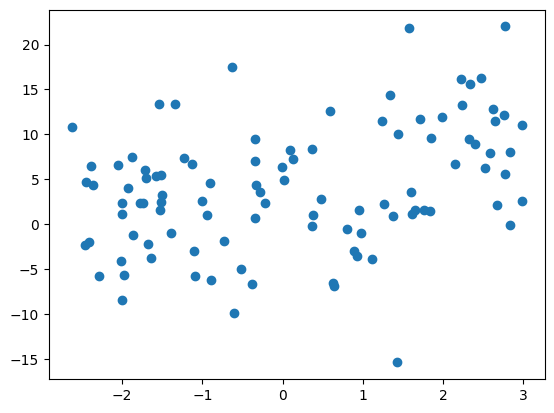

In [83]:
plt.scatter(x, y)

Como todos já devem saber, funções quadráticas descrevem uma parábola quando representadas em um gráfico.

No gráfico acima, é possível - e com certa dificuldade ainda - observar que o formato da imagem começa a definir uma parábola com cavidade para cima, como é característico de funções cujo theta_2, ou "termo quadrático", é positivo.

Na função descrita no exemplo:
- a ou theta_2 = 0.5
- b ou theta_1 = 2
- c ou theta_0 = 6

In [84]:
from sklearn.preprocessing import PolynomialFeatures

# Como de costume, fazemos a instanciação do modelo.
poly_features = PolynomialFeatures(degree = 2, include_bias=False)

Conforme pode ser observado nos argumentos da classe instanciada acima, degree representa o "grau" da função observada, no caso, é uma função do 2º grau.

In [85]:
# Aqui incluimos uma nova coluna na nossa matriz "x", nessa nova coluna está o valor inicial de x ao quadrado.
x_poly = poly_features.fit_transform(x)

x_poly

array([[-2.45673297e+00,  6.03553690e+00],
       [-6.27334642e-01,  3.93548753e-01],
       [-3.75768381e-01,  1.41201876e-01],
       [ 1.72217396e-02,  2.96588315e-04],
       [ 8.08666699e-01,  6.53941830e-01],
       [-8.20534836e-03,  6.73277417e-05],
       [ 8.92480017e-01,  7.96520581e-01],
       [ 1.59788828e+00,  2.55324696e+00],
       [ 2.39720861e+00,  5.74660912e+00],
       [ 2.47299879e+00,  6.11572303e+00],
       [ 2.98906482e+00,  8.93450851e+00],
       [ 1.65489758e+00,  2.73868602e+00],
       [ 6.37209738e-01,  4.06036251e-01],
       [ 5.94992960e-01,  3.54016623e-01],
       [ 2.33922458e+00,  5.47197164e+00],
       [-3.42663675e-01,  1.17418394e-01],
       [ 2.83665276e+00,  8.04659889e+00],
       [-1.51537422e+00,  2.29635902e+00],
       [ 2.67672810e+00,  7.16487329e+00],
       [-8.86261595e-01,  7.85459616e-01],
       [-6.00147309e-01,  3.60176792e-01],
       [-1.71566110e+00,  2.94349300e+00],
       [ 2.52717522e+00,  6.38661460e+00],
       [ 8.

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [88]:
# Aqui podemos observar que o modelo nos permite identificar facilmente as variáveis intercepto (theta_0) e os coeficientes (no caso theta_1 e theta_2)

print('Intercepto:',lin_reg.intercept_)
print('Coeficientes:',lin_reg.coef_)

Intercepto: [2.21294253]
Coeficientes: [[1.16597071 0.57720538]]


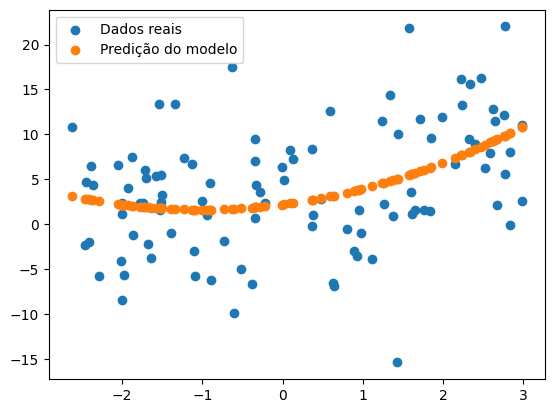

In [89]:
# Demonstração da predição realizada pelo modelo:
plt.scatter(x, y, label="Dados reais")
plt.scatter(x, lin_reg.predict(x_poly), label="Predição do modelo")
plt.legend()
plt.show()

### Balanço Viés-Variância ###

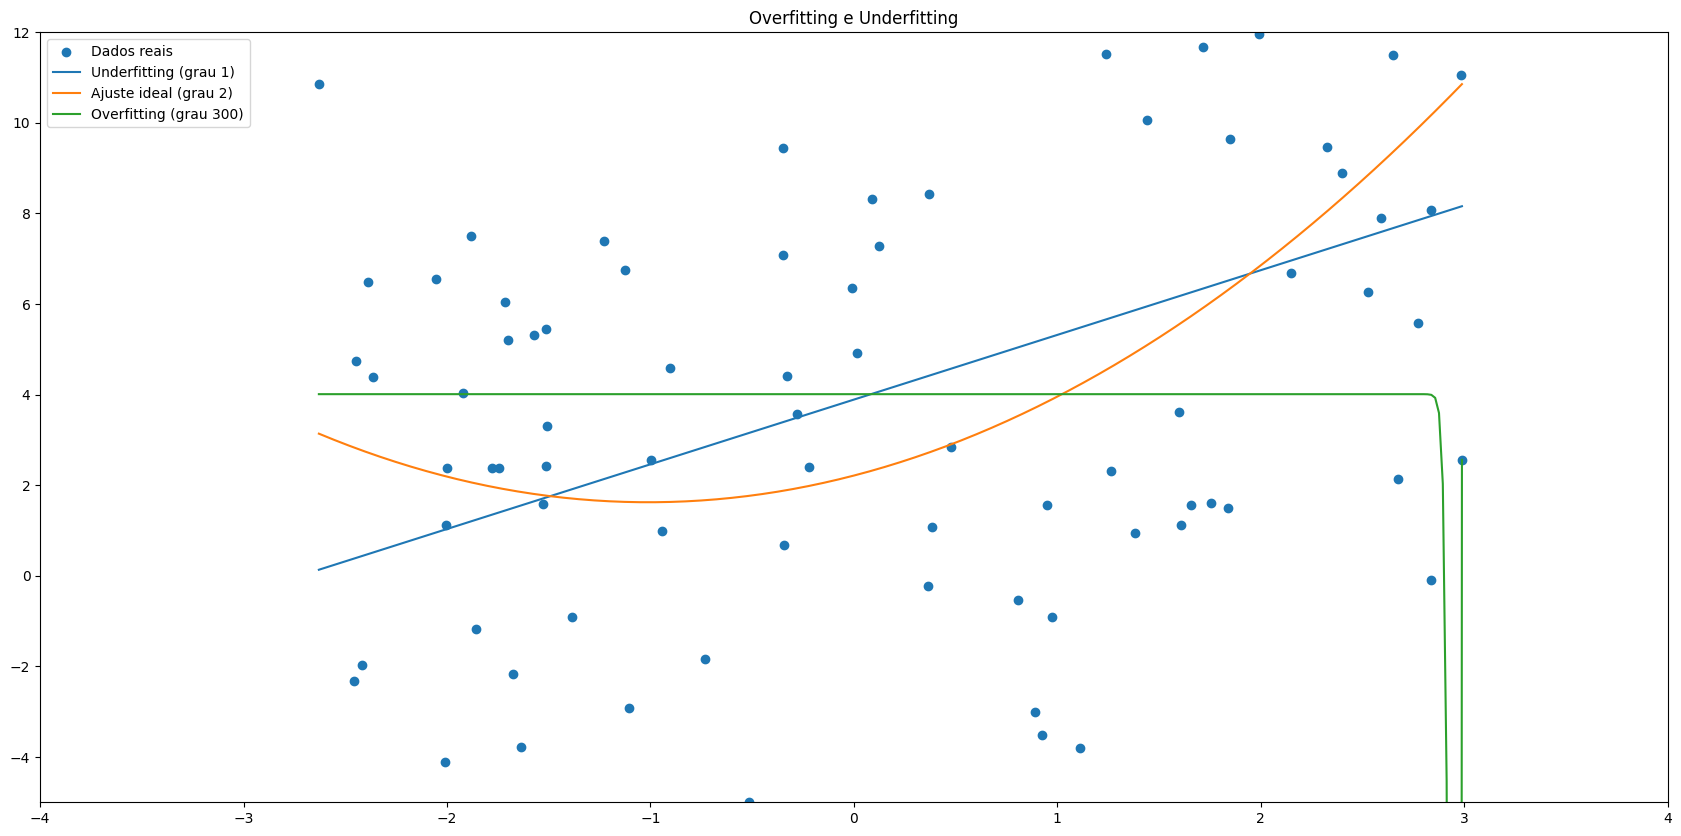

In [97]:
# No gráfico abaixo, duas das três linhas exemplificam perfeitamente os casos de Overfitting, Underfitting
fig, ax = plt.subplots(figsize=(21, 10))
plt.scatter(x, y, label="Dados reais")

# Dicionário com rótulos personalizados
legendas = {
    1: "Underfitting (grau 1)",
    2: "Ajuste ideal (grau 2)",
    300: "Overfitting (grau 300)"
}

for degree in [1, 2, 300]:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    x_seq = np.linspace(x.min(), x.max(), 300).reshape(-1,1)

    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)

    x_seq_transf = poly_features.fit_transform(x_seq)
    plt.plot(x_seq, lin_reg.predict(x_seq_transf), label=legendas[degree])
    plt.title('Overfitting e Underfitting')

ax.set_ylim([-5, 12])
ax.set_xlim([-4, 4])
plt.legend()
plt.show()


**Overfitting e Underfitting**

- Underfitting: Ocorre quando o modelo é muito simples para capturar os padrões dos dados, geralmente por considerar poucos parâmetros ou uma estrutura limitada. Isso faz com que ele não generalize bem, resultando em previsões imprecisas e desempenho fraco tanto nos dados de treino quanto nos de teste.

- Overfitting: Ocorre quando o modelo é excessivamente complexo, ajustando-se demais aos ruídos e detalhes específicos dos dados de treino. Com isso, ele perde a capacidade de generalização e tende a errar ao lidar com dados novos, pois considera características irrelevantes como determinantes.

**Viés e Variância**

- Viés: Refere-se ao erro introduzido pelo modelo ao fazer suposições simplificadas sobre os dados. Modelos com viés alto tendem a subestimar padrões importantes, ignorando complexidades da distribuição real. Isso resulta em previsões sistematicamente distantes dos valores corretos — típico de situações de underfitting.

- Variância: Representa a sensibilidade do modelo às variações nos dados de treino. Um modelo com variância alta se ajusta tão fortemente aos dados de entrada que perde a capacidade de generalização, mostrando desempenho instável em novos conjuntos de dados. É o cenário clássico de overfitting, onde até ruídos se tornam "regras".
